In [1]:
import numpy as np
import trimesh
from trimesh.registration import icp

import matplotlib.pyplot as plt

In [2]:
msh = trimesh.load_mesh("msh_fixed.ply")

In [10]:
with open("sfm.csv") as f:
    pts = np.asarray([[float(e) for e in row.strip().split(",")] for row in f.readlines()[1:]])[:,:3]
pts[:,2] = pts[:,2] + np.mean(msh.vertices[:,2]) - np.mean(pts[:,2])

In [11]:
z_extents = msh.bounds[:,2]
z_levels  = np.arange(*z_extents, step=0.25)
z_levels = z_levels # - np.min(z_levels)
sections = msh.section_multiplane(plane_origin=[0,0,0], 
                                   plane_normal=[0,0,1], 
                                   heights=z_levels)
ref_pts = np.vstack([np.hstack([section.vertices, z*np.ones((section.vertices.shape[0], 1))]) 
                     for section, z in zip(sections[1:], z_levels[1:])])   

In [13]:
tfm, pts_tfm, _ = icp(pts, ref_pts, reflection=False, translation=True, scale=False)

In [14]:
print(tfm)

[[ 9.91654531e-01 -1.17828307e-01  5.23238167e-02  5.05966456e+05]
 [ 1.24611664e-01  9.80085010e-01 -1.54613412e-01  3.38954869e+04]
 [-3.30639519e-02  1.59843248e-01  9.86588522e-01 -6.68203190e+05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


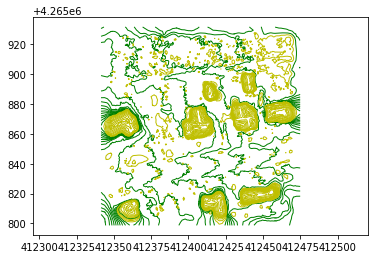

In [17]:
np.sum(sections[1:]).show()

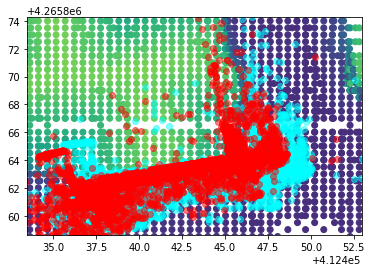

In [16]:
plt.figure()
plt.scatter(msh.vertices[:,0], msh.vertices[:,1], c=msh.vertices[:,2])
plt.scatter(pts[:,0], pts[:,1], c="cyan", alpha=0.5)
plt.scatter(pts_tfm[:,0], pts_tfm[:,1], c="red", alpha=0.5)
plt.xlim([pts[:,0].min(), pts[:,0].max()])
plt.ylim([pts[:,1].min(), pts[:,1].max()])
plt.show()

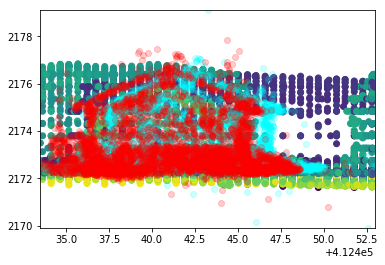

In [24]:
plt.figure()
plt.scatter(msh.vertices[:,0], msh.vertices[:,2], c=msh.vertices[:,1])
plt.scatter(pts[:,0], pts[:,2], c="cyan", alpha=0.2)
plt.scatter(pts_tfm[:,0], pts_tfm[:,2], c="red", alpha=0.2)
plt.xlim([pts[:,0].min(), pts[:,0].max()])
plt.ylim([pts[:,2].min(), pts[:,2].max()])
plt.show()